In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.graph_objects as go
import plotly.express as px

In [16]:
df = pd.read_csv('IndividualDetails.csv')


In [5]:
gender_count = df.groupby('gender')['detected_state'].sum()
gender_count


gender
F    KeralaRajasthanKeralaKeralaDelhiJammu and Kash...
M    DelhiTelanganaRajasthanDelhiUttar PradeshLadak...
Name: detected_state, dtype: object

In [6]:
#showing max number of cases
df_count=df.groupby(['detected_state'])['gender','age'].count()
new_df=df_count.style.background_gradient(cmap='Reds')


In [17]:
#The below DataFrame shows the most infected states throuogh a Red color.


In [8]:
#Total count of Males and Females
gender_count=df['gender'].value_counts()
gender_count

M    351
F    182
Name: gender, dtype: int64

# First Visualization

In [18]:
labels=df["detected_state"]+ " " + df["gender"].map(str)
sizes=df["age"]

#visualizing through histogram
px.histogram(df,x='detected_state',y='gender')



##### Note: This plot is not visible in github So i upload the FirstVisualization_bar.png file 

# Second Visualization

In [10]:
#visualizing through bar
px.bar(df,x='detected_state', y='gender')
px.

##### Note: This plot is not visible in github So i upload the SecondVisualization_bar.png file 

##  Third Visualizing through Pie Charts

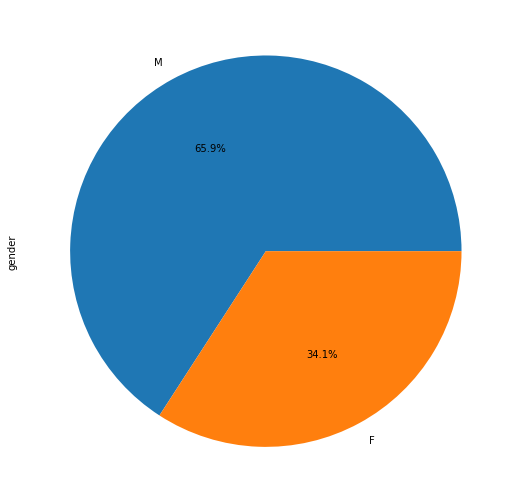

In [11]:
#The below pie chart shows the percentage of male and female pateints.
plt.figure(figsize=(12,9))
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")

# Fourth Visualization

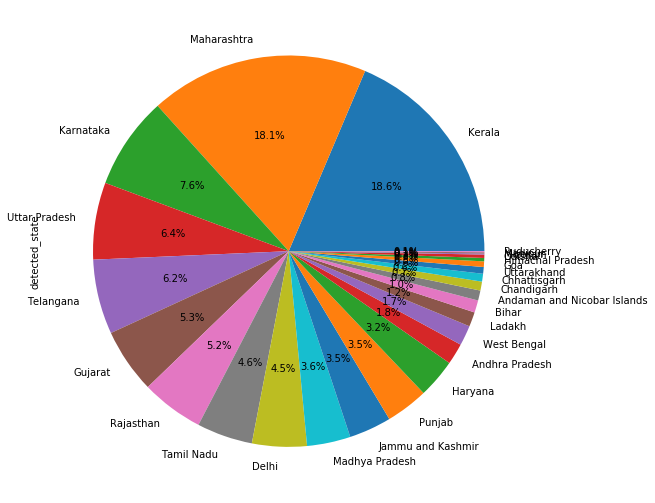

In [12]:
#The below pie chart shows the percentage of detected cases per state.
plt.figure(figsize=(12,9))
df['detected_state'].value_counts().plot.pie(autopct="%1.1f%%")

### Showing the number of males and females affected in each state. 

In [13]:
import numpy as np

In [14]:
df = pd.read_csv('IndividualDetails.csv')
data =df[["age","gender","detected_state"]]

# Fifth Visualization

E:\Anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




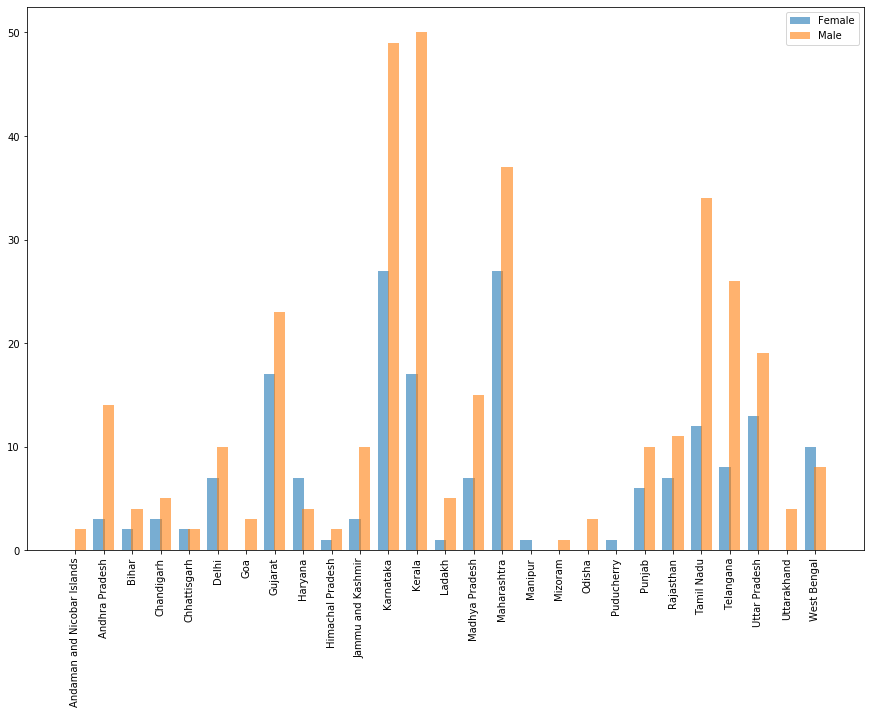

In [15]:
stgen=data[['detected_state','gender']].dropna()
female=pd.DataFrame(stgen.loc[stgen["gender"]=='F',['detected_state','gender']])
fe_count=pd.DataFrame(female['detected_state'].value_counts())
fe_count.columns=["count"]
x_axes=list(fe_count.index)
fe_count['detected_state']=x_axes
fe_count=fe_count.sort_values("detected_state")



male=pd.DataFrame(stgen.loc[stgen["gender"]=='M',['detected_state','gender']])
m_count=pd.DataFrame(male['detected_state'].value_counts())
m_count.columns=["count"]
xm_axes=list(m_count.index)
m_count['detected_state']=xm_axes
m_count=m_count.sort_values("detected_state")



lst=list(stgen['detected_state'].drop_duplicates())
fe={'detected_state':[],'count':[]}
ma={'detected_state':[],'count':[]}
for i in lst:
    if((str(i).strip() in fe_count['detected_state']) and (str(i).strip() not in m_count['detected_state'])):
        ma['detected_state'].append(i)
        ma['count'].append(0)   
    if((str(i).strip() not in fe_count['detected_state']) and (str(i).strip() in m_count['detected_state'])):
        fe['detected_state'].append(i)
        fe['count'].append(0)
dtf=pd.DataFrame(fe)
dtm=pd.DataFrame(ma)
fe_count=fe_count.append(dtf,ignore_index=True)
fe_count
m_count=m_count.append(dtm,ignore_index=True)



fe_count=fe_count.sort_values("detected_state")
m_count=m_count.sort_values("detected_state")
xm_axes=list(m_count.index)



plt.figure(figsize=(15,10))
#plt.pie(m_count['count'],autopct="%1.2f%%",pctdistance=0.3)
#plt.pie(fe_count['count'],autopct="%1.2f%%",pctdistance=0.5)
#plt.show()

x_axis=np.arange(len(fe_count))
xm_axis=np.arange(len(m_count))


plt.bar(xm_axis-0.17,fe_count["count"],alpha=.6,label='Female',width=0.4)
plt.bar(xm_axis+0.17,m_count["count"],alpha=.6,label='Male',width=0.4)
plt.xticks(xm_axis,list(m_count['detected_state']),rotation=90)
plt.legend()
plt.show()


## The above graphs shows the cases per gender in a particular state. Where the blue denotes the cases of female and orange denotes the male cases per states.